In this exercise we want you to to compute the MSE for the training
data and the test data as function of the complexity of a polynomial,
that is the degree of a given polynomial.

The aim is to reproduce Figure 2.11 of [Hastie et al](https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf).

Our data is defined by $x\in [-3,3]$ with a total of for example $n=100$ data points. You should try to vary the number of data points $n$ in your analysis.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
np.random.seed()
n = 100
# Make data set
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

**a)**
Write a first code which sets up a design matrix $X$ defined by a fifth-order polynomial and split your data set in training and test data.

In [3]:
# Create design matrix
X = np.column_stack([x ** i for i in range(6)]) 
X

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01,  8.10000000e+01, -2.43000000e+02],
       [ 1.00000000e+00, -2.93939394e+00,  8.64003673e+00,
        -2.53964716e+01,  7.46502347e+01, -2.19426447e+02],
       [ 1.00000000e+00, -2.87878788e+00,  8.28741965e+00,
        -2.38577232e+01,  6.86813245e+01, -1.97718964e+02],
       [ 1.00000000e+00, -2.81818182e+00,  7.94214876e+00,
        -2.23824192e+01,  6.30777269e+01, -1.77764503e+02],
       [ 1.00000000e+00, -2.75757576e+00,  7.60422406e+00,
        -2.09692239e+01,  5.78242235e+01, -1.59454677e+02],
       [ 1.00000000e+00, -2.69696970e+00,  7.27364555e+00,
        -1.96168016e+01,  5.29059195e+01, -1.42685662e+02],
       [ 1.00000000e+00, -2.63636364e+00,  6.95041322e+00,
        -1.83238167e+01,  4.83082440e+01, -1.27358098e+02],
       [ 1.00000000e+00, -2.57575758e+00,  6.63452709e+00,
        -1.70889334e+01,  4.40169497e+01, -1.13376992e+02],
       [ 1.00000000e+00, -2.51515152e+00,  6.325

In [4]:
# Split data set in training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**b)**
Write thereafter (using either **scikit-learn** or your matrix inversion code using for example **numpy**)
and perform an ordinary least squares fitting and compute the mean squared error for the training data and the test data. These calculations should apply to a model given by a fifth-order polynomial.

In [7]:
# Matrix inversion to find beta
beta = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
print(beta)

# Make the prediction
ytilde = X_train @ beta
ypredict = X_test @ beta

[[ 0.82609284]
 [ 0.24851518]
 [-0.02654659]
 [ 0.06973519]
 [-0.00190649]
 [-0.01079666]]


In [8]:
print("Training mean squared error: %.2f" % mean_squared_error(y_train, ytilde))
print("Test mean squared error: %.2f" % mean_squared_error(y_test, ypredict))

Training mean squared error: 0.03
Test mean squared error: 0.04


As expected, the training mean squared error is better than the test mean squared error.

**c)**
Add now a model which allows you to make polynomials up to degree $15$.  Perform a standard OLS fitting of the training data and compute the MSE for the training and test data and plot both test and training data MSE as functions of the polynomial degree. Compare what you see with Figure 2.11 of Hastie et al. Comment your results. For which polynomial degree do you find an optimal MSE (smallest value)?

In [44]:
n = 100
maxdegree = 15
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

In [45]:
train_mse = np.zeros(maxdegree)
test_mse = np.zeros(maxdegree)
poly_degree = np.zeros(maxdegree)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [47]:
for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree = degree), LinearRegression(fit_intercept = False))
    clf = model.fit(x_train_scaled, y_train)
    y_fit = clf.predict(x_train_scaled)
    y_pred = clf.predict(x_test_scaled)
    poly_degree[degree] = degree
    test_mse[degree] = np.mean((y_test-y_pred)**2)
    train_mse[degree] = np.mean((y_train-y_fit)**2)

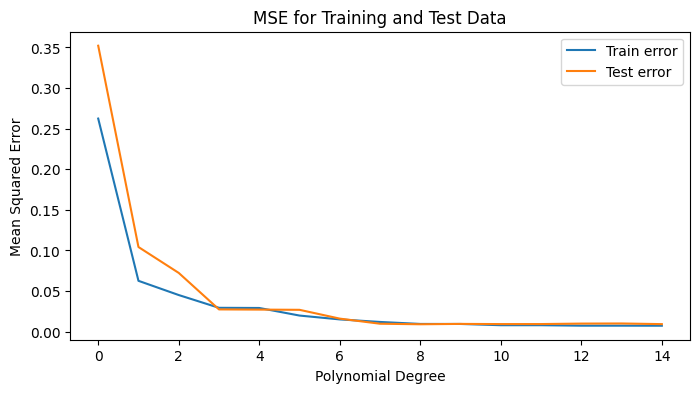

In [48]:
# Plotting MSE for training and test data
plt.figure(figsize=(8, 4))
plt.plot(poly_degree, train_mse, label='Train error')
plt.plot(poly_degree, test_mse, label='Test error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Training and Test Data')
plt.legend()
plt.show()

The figure is not equal to the one in the book, but it is due to the fact that we are analyzing low polynomial degrees. If, for example you put maxdegree = 30, it is possible to see that for degrees near 30, the curve of train error start going up.

In [58]:
print("Optimal MSE degree:")
print(test_mse.argmin()+1) # argmax +1 because indexes in Python start from 0 

Optimal MSE degree:
9
